In [20]:
#init datasets
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets
def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'], columns = ds['feature_names'])
    code_species_map = dict(zip(range(3), ds['target_names']))
    df['species'] = [code_species_map[c]
    for c in ds['target']]
    return df
df = get_iris_df()

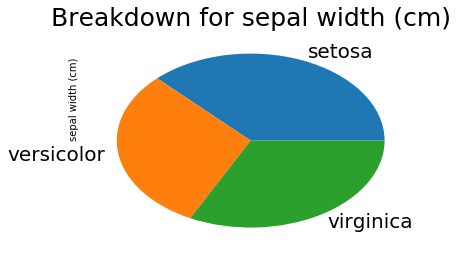

In [21]:
#Pie charts are used to show to show ratios of subsets with regard to a larger complete dataset
#Example: Which parties were most voted for in an election
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind = 'pie', fontsize = 20)
plt.ylabel(var, horizontalalignment = 'left')
plt.title('Breakdown for ' + var, fontsize = 25)
plt.savefig('iris_pie_for_one_variable.jpg')
plt.show()
plt.close()

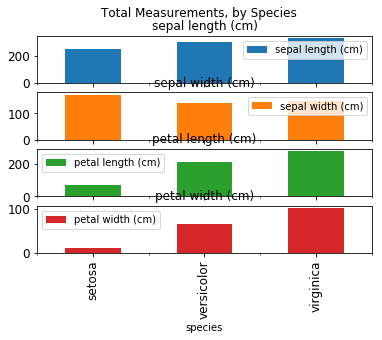

In [22]:
#Bar charts are used to compare different categories with each other, the length of the bar is proportional to it's value
sums_by_species = df.groupby('species').sum()
var = 'sepal width (cm)'
sums_by_species[var].plot(kind = 'bar', fontsize = 15, rot = 30)
plt.title('Breakdown for ' + var, fontsize = 10)
plt.savefig('iris_bar_for_one_variable.jpg')
plt.close()
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(kind='bar', subplots = True, fontsize = 12)
plt.suptitle('Total Measurements, by Species')
plt.savefig('iris_bar_for_each_variable.jpg')
plt.show()
plt.close()

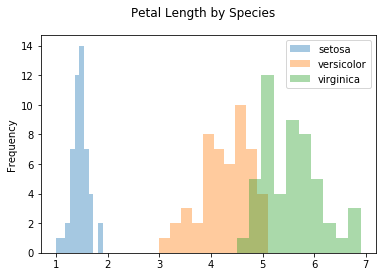

In [23]:
#Histograms operate in a similar way to bar charts with the difference being that histograms
#are exclusively used to show the frequency datapoints occur in an distribution.
for spec in df['species'].unique():
    forspec = df[df['species']==spec]
    forspec['petal length (cm)'].plot(kind = 'hist', alpha = 0.4, label = spec)
plt.legend(loc='upper right')
plt.suptitle('Petal Length by Species')
plt.savefig('iris_hist_by_spec.jpg')
plt.show()
plt.close()

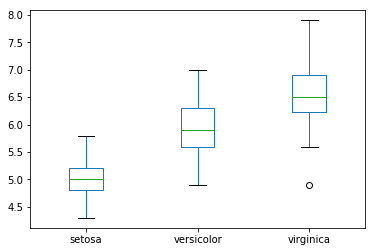

In [24]:
#Boxplots are used to visually represent the distribution of datapoint in a larger set.
#The lines in a boxplot represents: global minimum, first quartile, median, third quartile, and global maximum
col = "sepal length (cm)"
df['ind'] = pd.Series(df.index).apply(lambda i: i% 50)
df.pivot('ind','species')[col].plot(kind = 'box')
plt.show()
plt.savefig('boxplot.jpg')
plt.close()

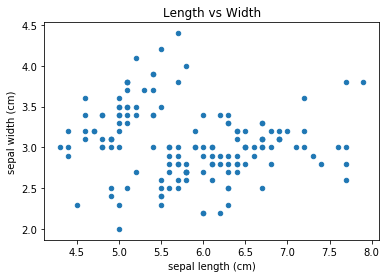

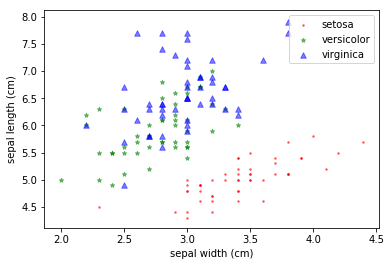

In [25]:
#Scatterplots are used to compare one variable with another.
#Scatterplots are therefore useful to determine a correlation between two datasets.
df.plot(kind = "scatter", x = "sepal length (cm)", y = "sepal width (cm)")
plt.title("Length vs Width")
plt.show()
colors = ["r", "g", "b"]
markers= [".", "*", "^"]
fig, ax = plt.subplots(1, 1)
for i, spec in enumerate(df['species'].unique() ):
    ddf = df[df['species'] == spec]
    ddf.plot(kind="scatter",
    x = "sepal width (cm)", y = "sepal length (cm)",
    alpha = 0.5, s = 10*(i+1), ax = ax,
    color = colors[i], marker = markers[i], label = spec)
plt.legend()
plt.show()
plt.savefig('scatterplot.jpg')
plt.close()

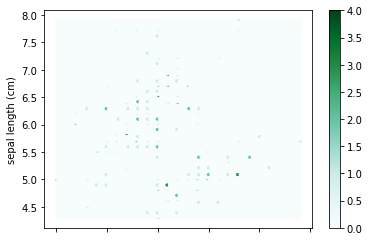

In [26]:
#Heatmaps are used to represent 3 or higher dimension data, where the x and y axis as well as the colour represents the data 
df.plot(kind = "hexbin", x = "sepal width (cm)", y = "sepal length (cm)")
plt.show()
plt.savefig('heatmap.jpg')
plt.close()

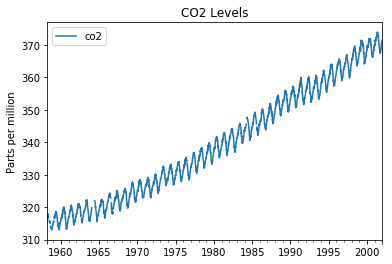

In [27]:
#Time series are used to show how a variable changes over time
import statsmodels.api as sm
dta = sm.datasets.co2.load_pandas().data
dta.plot()
plt.title("CO2 Levels")
plt.ylabel("Parts per million")
plt.show()
plt.savefig('timeseries.jpg')
plt.close()